In [1]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import PIL

import numpy as np
import pandas as pd
import watermark
%reload_ext nb_black
%matplotlib inline

<IPython.core.display.Javascript object>

## Optical Illusion

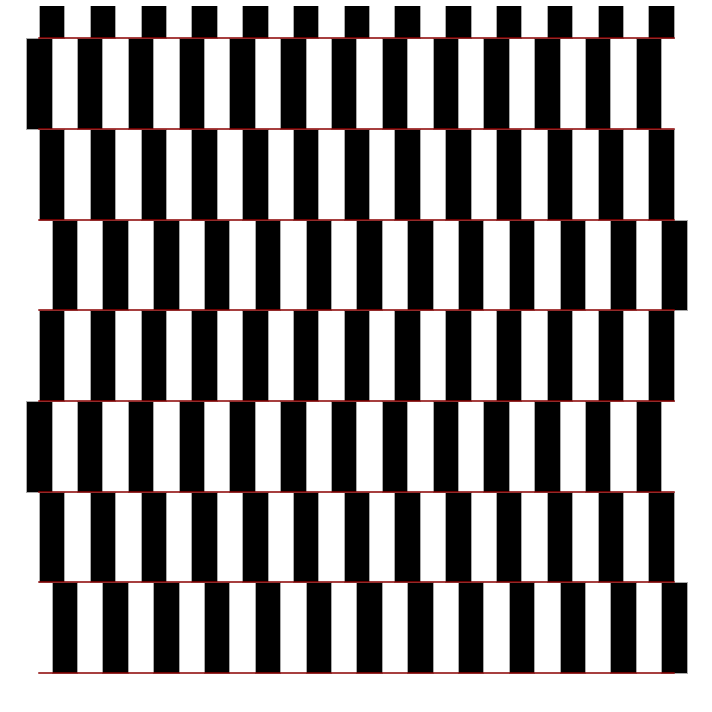

<IPython.core.display.Javascript object>

In [2]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()

squares = []

for i in range(8):
    ax.plot([0, 25], [i, i], "darkred")

    for j in range(0, 26, 2):
        sq = Rectangle((j + 0.5 * np.sin((i + 1) * np.pi / 2), i), 1, 1, fill=True)
        squares.append(sq)

pc = PatchCollection(squares, facecolor="black", edgecolor="darkgrey")
ax.add_collection(pc)
ax.axis("off")
fig.tight_layout()

## Bubble Plot
Data source: http://www.gapminder.org 

In [3]:
data = pd.read_csv("data/gapminder.csv")
colors = np.array(["#5A6FFA", "#E60DA1", "#7E7E7E", "#B7F025", "#FF9A1E"])
continents = ["Africa", "Americas", "Asia", "Europe", "Oceania"]

<IPython.core.display.Javascript object>

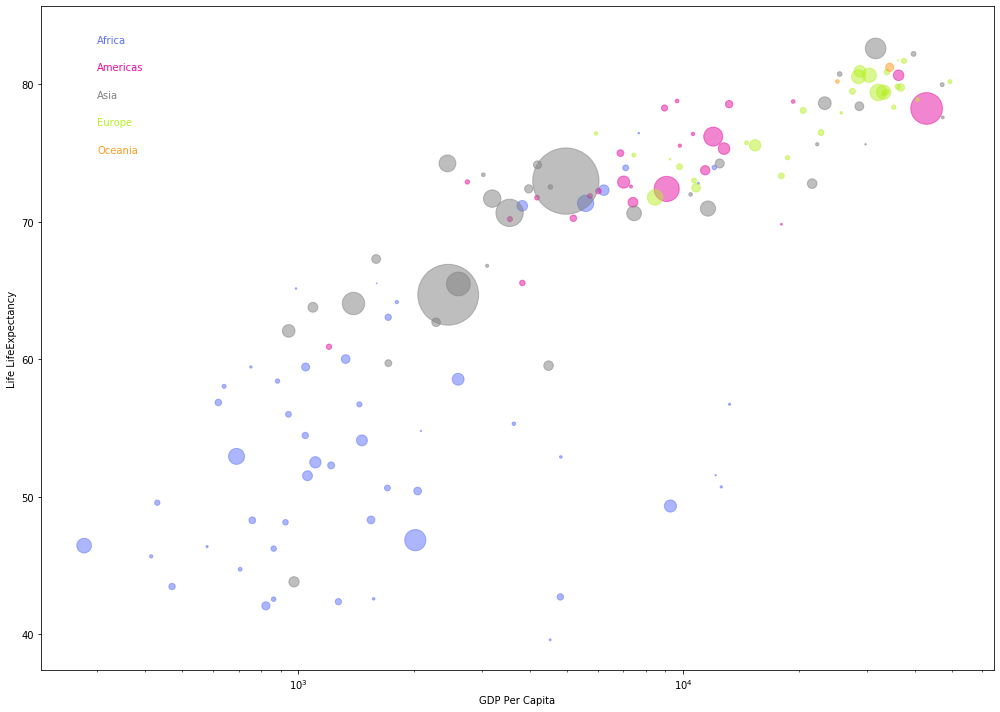

<IPython.core.display.Javascript object>

In [4]:
fig = plt.figure()
ax = plt.gca()

fig.set_size_inches(14, 10)

for i in range(5):
    continent = data[data["Continent"] == i]

    sc = ax.scatter(
        continent["GDP"],
        continent["LifeExpectancy"],
        s=continent["Population"] / 300000,
        color=colors[i],
        alpha=0.5,
    )

for i in range(len(continents)):
    ax.text(300, 83 - i * 2, continents[i], color=colors[i])

ax.set_xscale("log")

ax.set_xlabel("GDP Per Capita")
ax.set_ylabel("Life LifeExpectancy")

fig.tight_layout()

## Bar Plot
Data source: https://www.kaggle.com/danofer/india-census

In [5]:
census_df = pd.read_csv("data/india-districts-census-2011.csv")

<IPython.core.display.Javascript object>

In [6]:
census_df = census_df[
    [
        "State name",
        "District name",
        "Population",
        "Male",
        "Female",
        "Literate",
        "Male_Literate",
        "Female_Literate",
    ]
]

<IPython.core.display.Javascript object>

In [7]:
census_state_sum = census_df.groupby(["State name"]).sum()

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Population-Gender-Literacy Comparison India')

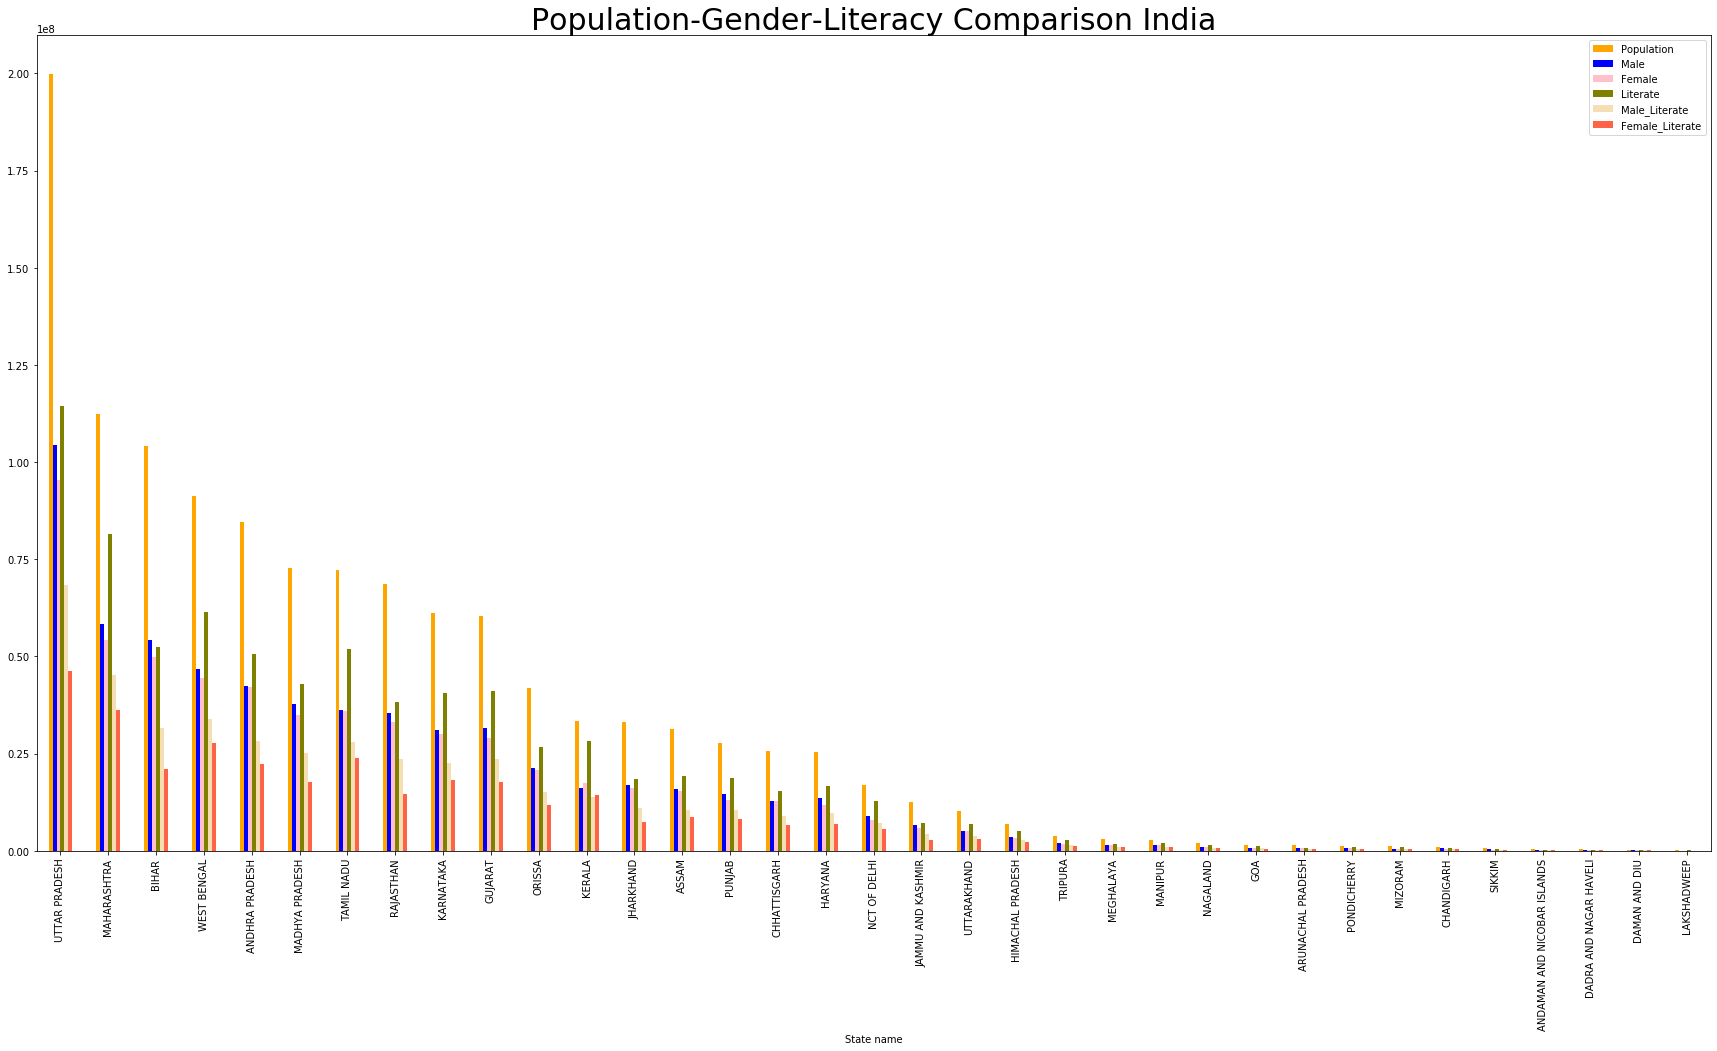

<IPython.core.display.Javascript object>

In [8]:
census_state_sum.sort_values(["Population"], ascending=False)[
    ["Population", "Male", "Female", "Literate", "Male_Literate", "Female_Literate"]
].plot.bar(
    figsize=(30, 15), color=["orange", "blue", "pink", "olive", "wheat", "tomato"]
)
plt.title("Population-Gender-Literacy Comparison India", fontsize=30)

## Image

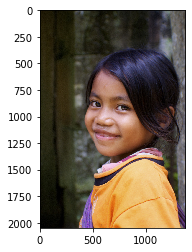

<IPython.core.display.Javascript object>

In [9]:
img = mpimg.imread("data/cambodja.jpg")
plt.imshow(img)

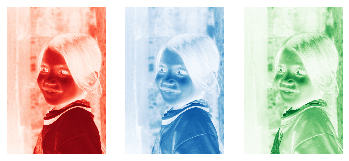

<IPython.core.display.Javascript object>

In [10]:
fig, axs = plt.subplots(1, 3)

axs[0].imshow(img[:, :, 0], cmap=plt.get_cmap("Reds"))
axs[0].set_axis_off()

axs[1].imshow(img[:, :, 1], cmap=plt.get_cmap("Blues"))
axs[1].set_axis_off()

axs[2].imshow(img[:, :, 2], cmap=plt.get_cmap("Greens"))
axs[2].set_axis_off()

## Mapping
Data sources:

https://www.kaggle.com/danofer/india-census

https://archive.org/details/AadharSaturation

https://data.gov.in/catalog/location-gold-deposits-india-and-its-salient-features

In [11]:
census_map_df = pd.read_csv("data/district wise population and centroids.csv")

<IPython.core.display.Javascript object>

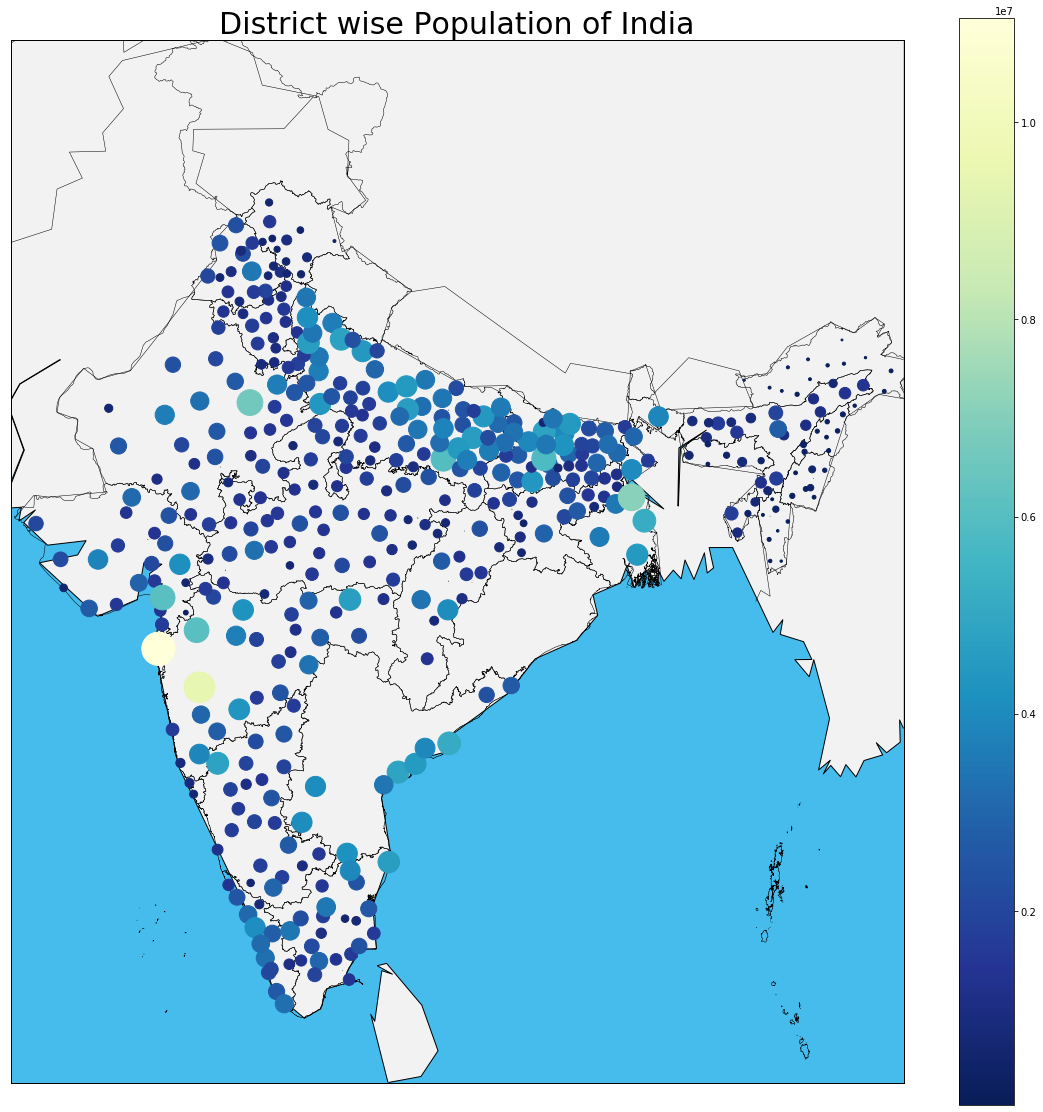

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(20, 20))

map = Basemap(
    resolution="c",
    projection="merc",
    lat_0=54.5,
    lon_0=-4.36,
    llcrnrlon=68.0,
    llcrnrlat=6.0,
    urcrnrlon=97.0,
    urcrnrlat=37.0,
)
map.readshapefile("data/India_SHP/INDIA", "INDIA")
map.drawmapboundary(fill_color="#46bcec")
map.fillcontinents(color="#f2f2f2", lake_color="#46bcec")
map.drawcoastlines()
map.drawcountries()
map.drawstates()

lons, lats = map(list(census_map_df["Longitude"]), list(census_map_df["Latitude"]))

map.scatter(
    lons,
    lats,
    zorder=5,
    s=census_map_df["Population in 2011"] / 10000,
    c=census_map_df["Population in 2011"],
    cmap="YlGnBu_r",
)

plt.title("District wise Population of India", fontsize=30)
plt.colorbar()

In [13]:
import re

# https://stackoverflow.com/questions/33997361
def dms2dd(s):

    degrees, minutes = re.split("[^\d\w]+", s)
    direction = minutes[-1]
    minutes = minutes[:-1]
    dd = float(degrees) + float(minutes) / 60
    if direction in ("S", "W"):
        dd *= -1
    return dd

<IPython.core.display.Javascript object>

In [14]:
gold_df = pd.read_excel("data/Gold-.xls")

<IPython.core.display.Javascript object>

In [15]:
gold_df["LATITUDE"] = gold_df["LATITUDE"].apply(dms2dd)
gold_df["LONGITUDE"] = gold_df["LONGITUDE"].apply(dms2dd)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Gold Reserves of India')

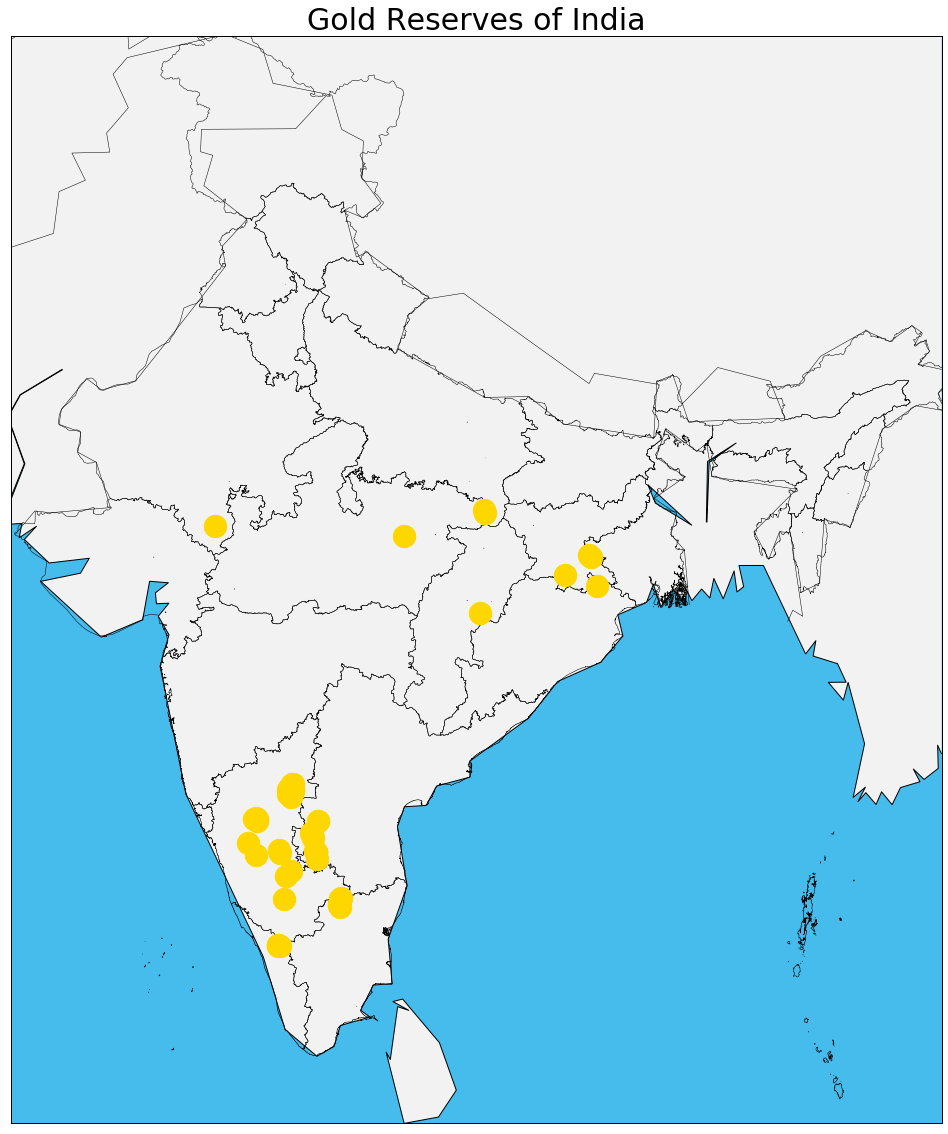

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(20, 20))
map = Basemap(
    resolution="c",
    projection="merc",
    lat_0=54.5,
    lon_0=-4.36,
    llcrnrlon=68.0,
    llcrnrlat=6.0,
    urcrnrlon=97.0,
    urcrnrlat=37.0,
)
map.readshapefile("data/India_SHP/INDIA", "INDIA")
map.drawmapboundary(fill_color="#46bcec")
map.fillcontinents(color="#f2f2f2", lake_color="#46bcec")
map.drawcoastlines()
map.drawcountries()
map.drawstates()

lons, lats = map(list(gold_df["LONGITUDE"]), list(gold_df["LATITUDE"]))

plt.scatter(lons, lats, s=500, zorder=5, marker="o", color="Gold")
plt.title("Gold Reserves of India", fontsize=30)